# Explore here

In [2]:
# Librerias

import pandas as pd
import numpy as np


In [3]:
# Creamos el DataFrame a partir de la lectura del CSV online

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# Guardamos el DataFrame en la carpeta data/raw como un CSV

df.to_csv('../data/raw/df.csv')

In [5]:
# Análisamos las dimensiones del DataFrame 

df.shape

(48895, 16)

In [6]:
# Análisamos valores faltantes y tipos de datos por columna (categoricas y númericas)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
#Revisamos duplicados 

df.duplicated().sum() # Columnas Duplicadas
print(df['id'].duplicated().sum()) # Verificamos que no hay id duplicados, para garantizar registros únicos


0


In [8]:
# Eliminar informción irrelevante

columnas_eliminar = ['id','last_review', 'reviews_per_month', 'host_name', 'name'] # Concluímos que estas columnas no aportan nada para la resolución 
df.drop(columnas_eliminar, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.1+ MB


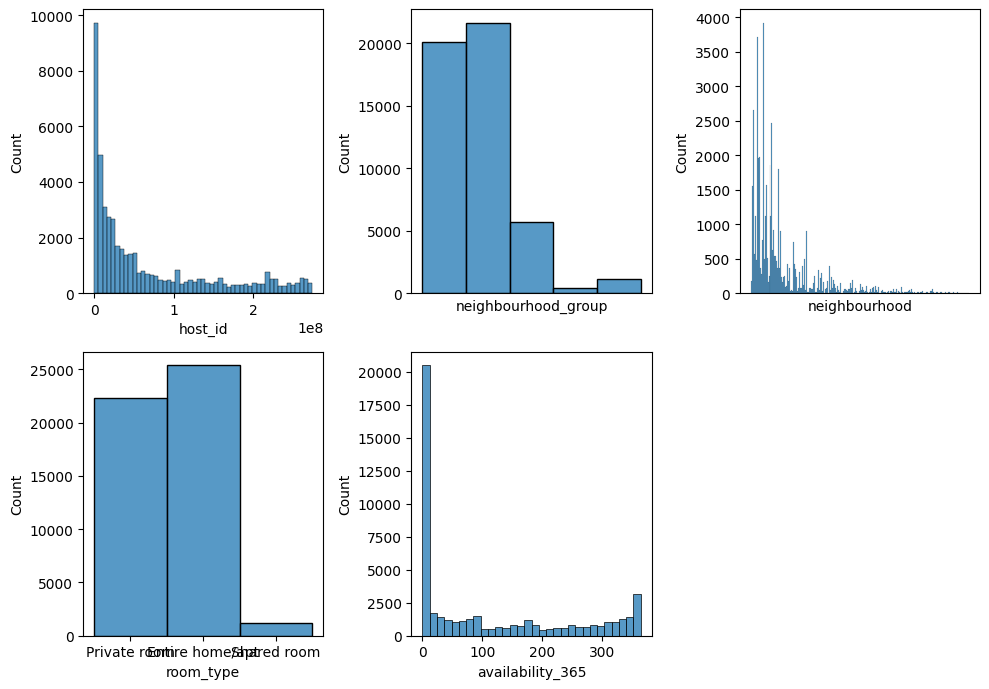

In [9]:
# Anilisis Univariante

    #Analisis Variables Categoricas ('host_id','neighbourhood_group','neighbourhood', 'room_type','availability_365')

import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2,3,figsize=(10,7))

#histogramas
sns.histplot(ax= axis[0,0],data=df,x='host_id')
sns.histplot(ax= axis[0,1],data=df,x='neighbourhood_group').set_xticks([])
sns.histplot(ax= axis[0,2],data=df,x='neighbourhood').set_xticks([])
sns.histplot(ax= axis[1,0],data=df,x='room_type')
sns.histplot(ax= axis[1,1],data=df,x='availability_365') #Esta variable se puede analisar tanto como categorica como númerica
fig.delaxes(axis[1,2]) #Eliminamos el axis que queda vacío
plt.tight_layout()
plt.show()



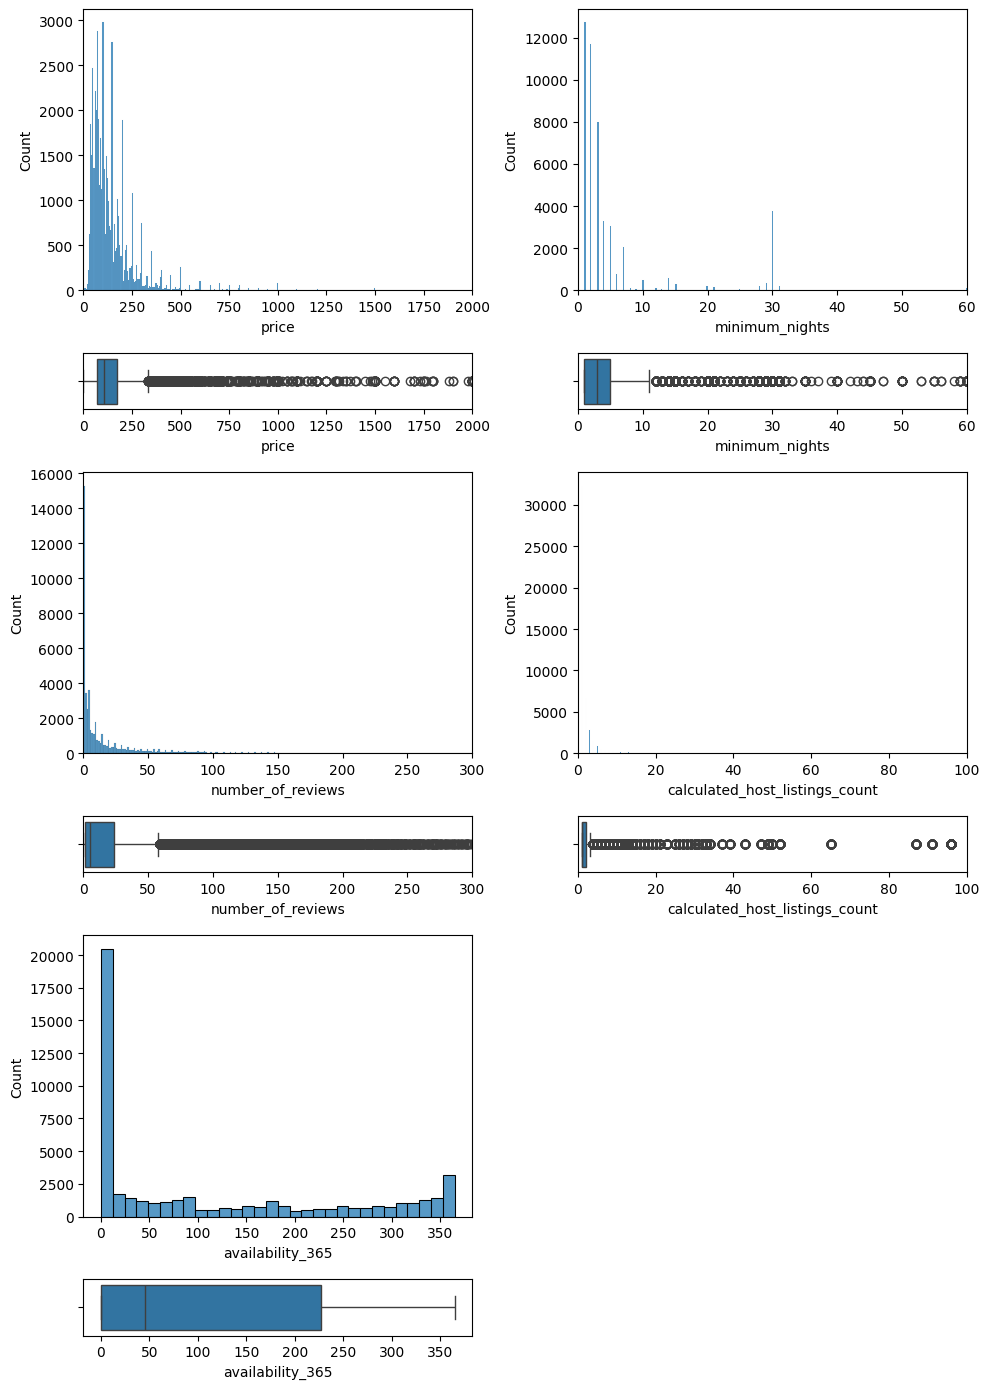

In [10]:
    # Analisis de Variables númericas ('price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count')


fig, axis = plt.subplots(6,2,figsize=(10,14),gridspec_kw={"height_ratios":[5,1,5,1,5,1]}) #Gridspec_kw establece la relacíon de los ratios del gráfico

sns.histplot(ax=axis[0,0],data=df,x='price').set_xlim(0,2000) #Se fijan limites para ver como se comporta la variable en un conjunto más reducido
sns.boxplot(ax=axis[1,0],data=df,x='price').set_xlim(0,2000)

sns.histplot(ax=axis[0,1],data=df,x='minimum_nights').set_xlim(0,60) 
sns.boxplot(ax=axis[1,1],data=df,x='minimum_nights').set_xlim(0,60)

sns.histplot(ax=axis[2,0],data=df,x='number_of_reviews').set_xlim(0,300)
sns.boxplot(ax=axis[3,0],data=df,x='number_of_reviews').set_xlim(0,300)

sns.histplot(ax=axis[2,1],data=df,x='calculated_host_listings_count').set_xlim(0,100)
sns.boxplot(ax=axis[3,1],data=df,x='calculated_host_listings_count').set_xlim(0,100)

sns.histplot(ax=axis[4,0],data=df,x='availability_365')
sns.boxplot(ax=axis[5,0],data=df,x='availability_365')

fig.delaxes(axis[5,1])
fig.delaxes(axis[4,1])
            
plt.tight_layout()
plt.show()
            

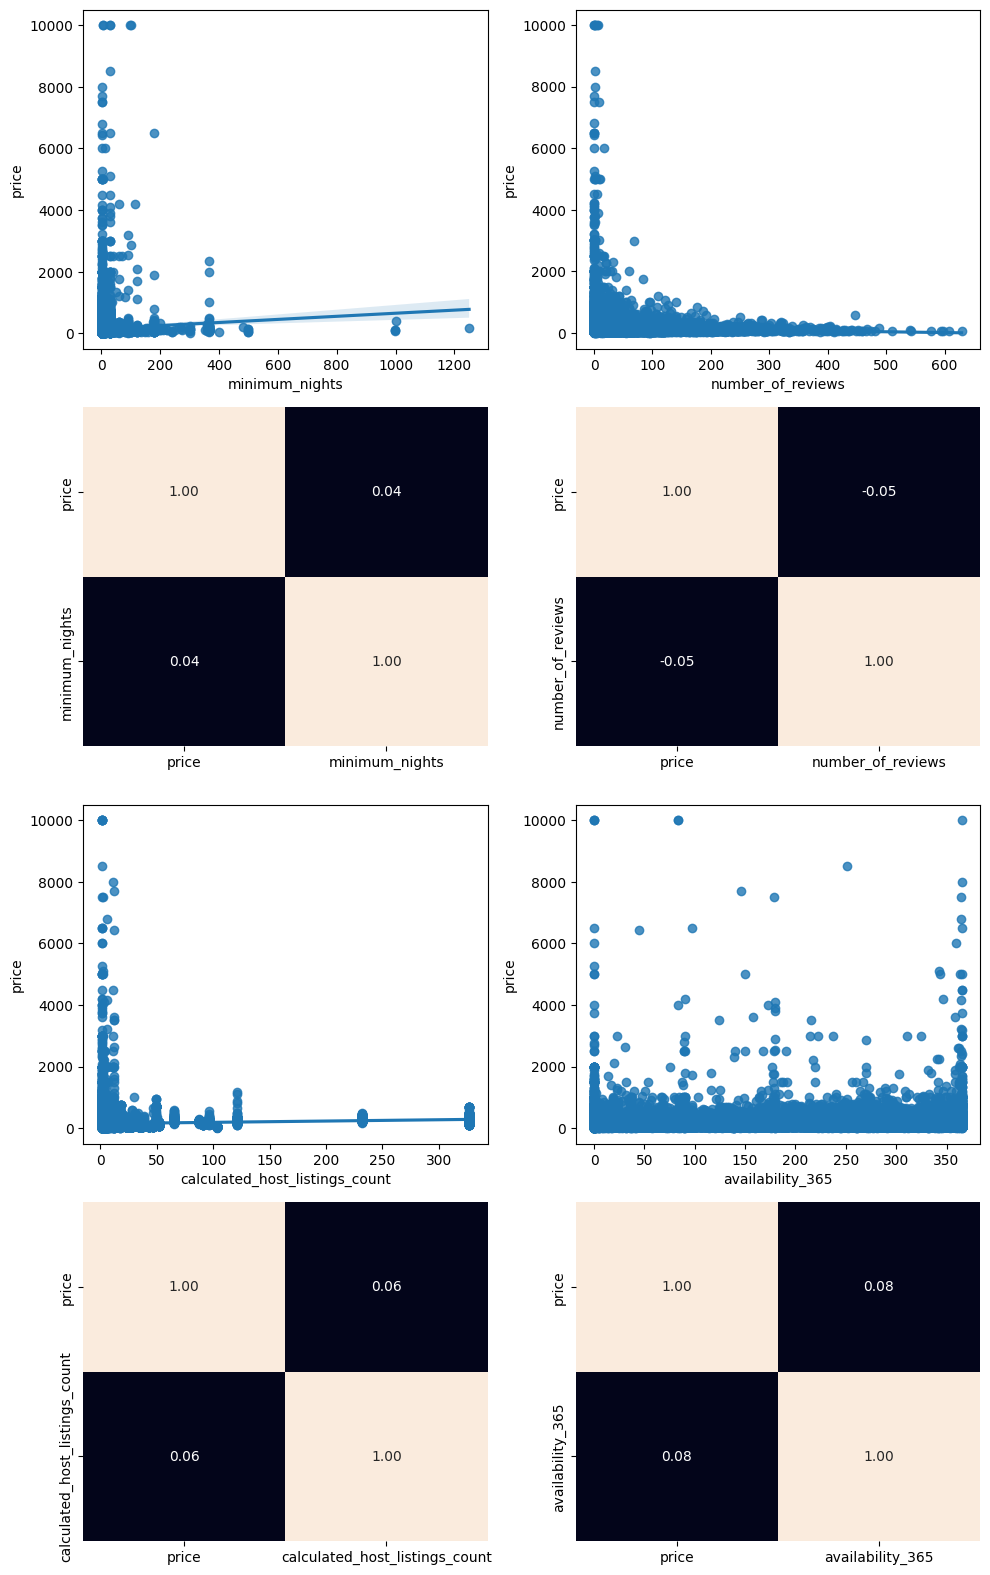

In [11]:
# Analisis Multivariante
    # Anlisis Numerico - numerico

fig, axis = plt.subplots(4,2,figsize=(10,16))

#Contrastamos las variables predictoras númericas con la variable objetivo

sns.regplot(ax=axis[0,0], data=df, x="minimum_nights", y="price")
sns.heatmap(df[['price','minimum_nights']].corr(),annot=True,fmt='.2f',ax=axis[1,0],cbar=False)

sns.regplot(ax=axis[0,1], data=df, x="number_of_reviews", y="price")
sns.heatmap(df[['price','number_of_reviews']].corr(),annot=True,fmt='.2f',ax=axis[1,1],cbar=False)

sns.regplot(ax=axis[2,0], data=df, x="calculated_host_listings_count", y="price")
sns.heatmap(df[['price','calculated_host_listings_count']].corr(),annot=True,fmt='.2f',ax=axis[3,0],cbar=False)

sns.regplot(ax=axis[2,1], data=df, x="availability_365", y="price")
sns.heatmap(df[['price','availability_365']].corr(),annot=True,fmt='.2f',ax=axis[3,1],cbar=False)

plt.tight_layout()
plt.show()

Analisis:

Ninguna de estar variables POR SI SOLA, es capaz de predecir la variable objetivo, ya que tenemos una baja correlación con la misma.

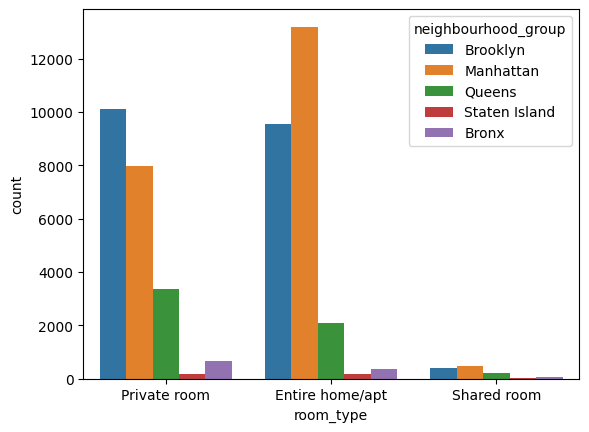

In [12]:
    # Analisis Categorico - Categerico 

#Contrastamos las variables categoricas contra la objetivo en un solo gráfico
#Como son variables categoricas utilizamos el boxplot
sns.countplot(data=df,x='room_type',hue='neighbourhood_group')
plt.show()

Nota: Se hace solo este análisis cátegorico - cátegorico ya que las demás variables cátegoricas del DF las habíamos eliminado con anterioridad, ya que definimos que no eran relevantes para este problema ('neighbourdhood' es un subconjunto de 'neighbourdhood_group)

In [13]:
    # Analisis Numerico - Categorico

#Debemos Factorizar las variables cátegoricas, para poder hacer matriz de correlaciónes 
df['room_type'] = pd.factorize(df['room_type'])[0]
df['neighbourhood_group'] = pd.factorize(df['neighbourhood_group'])[0]
df['neighbourhood'] = pd.factorize(df['neighbourhood'])[0]

#Comprobamos como quedo el DataFrame con las variables factorizadas
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,0,0,40.64749,-73.97237,0,149,1,9,6,365
1,2845,1,1,40.75362,-73.98377,1,225,1,45,2,355
2,4632,1,2,40.80902,-73.94190,0,150,3,0,1,365
3,4869,0,3,40.68514,-73.95976,1,89,1,270,1,194
4,7192,1,4,40.79851,-73.94399,1,80,10,9,1,0


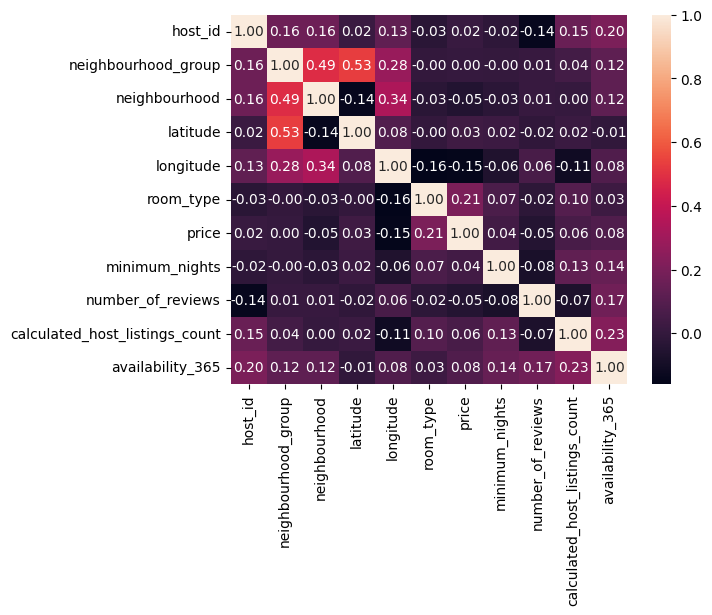

In [14]:
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

Análisis:

El Tipo de Habitación es la variable que, por sí sola, más esta relacionada con el Precio.
La Longitud, que podemos inferir como la ubicación, tambien tiene una relacion con el Precio.
Tambien podemos ver una alta correlacion entre variables predictoras, lo que nos dice que algunas de esas variables deben ser eliminadas.

In [15]:
    # Analisis Completo de Correlaciones entre todas las variables

#Paso Opcional, pero que brinda mucha información de manera "sencilla"
sns.pairplot(data=df)
plt.show()

Nota: Con la función pairplot aseguro que no hayan variables que esten influyendose una con otra

In [16]:
# Ingeniería de Características

    #Analisamos las métricas de nuestro DF
df.describe()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,0.786911,29.888782,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.844386,34.676634,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,0.000000,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,0.000000,7.500000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,1.000000,19.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,1.000000,37.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,4.000000,220.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


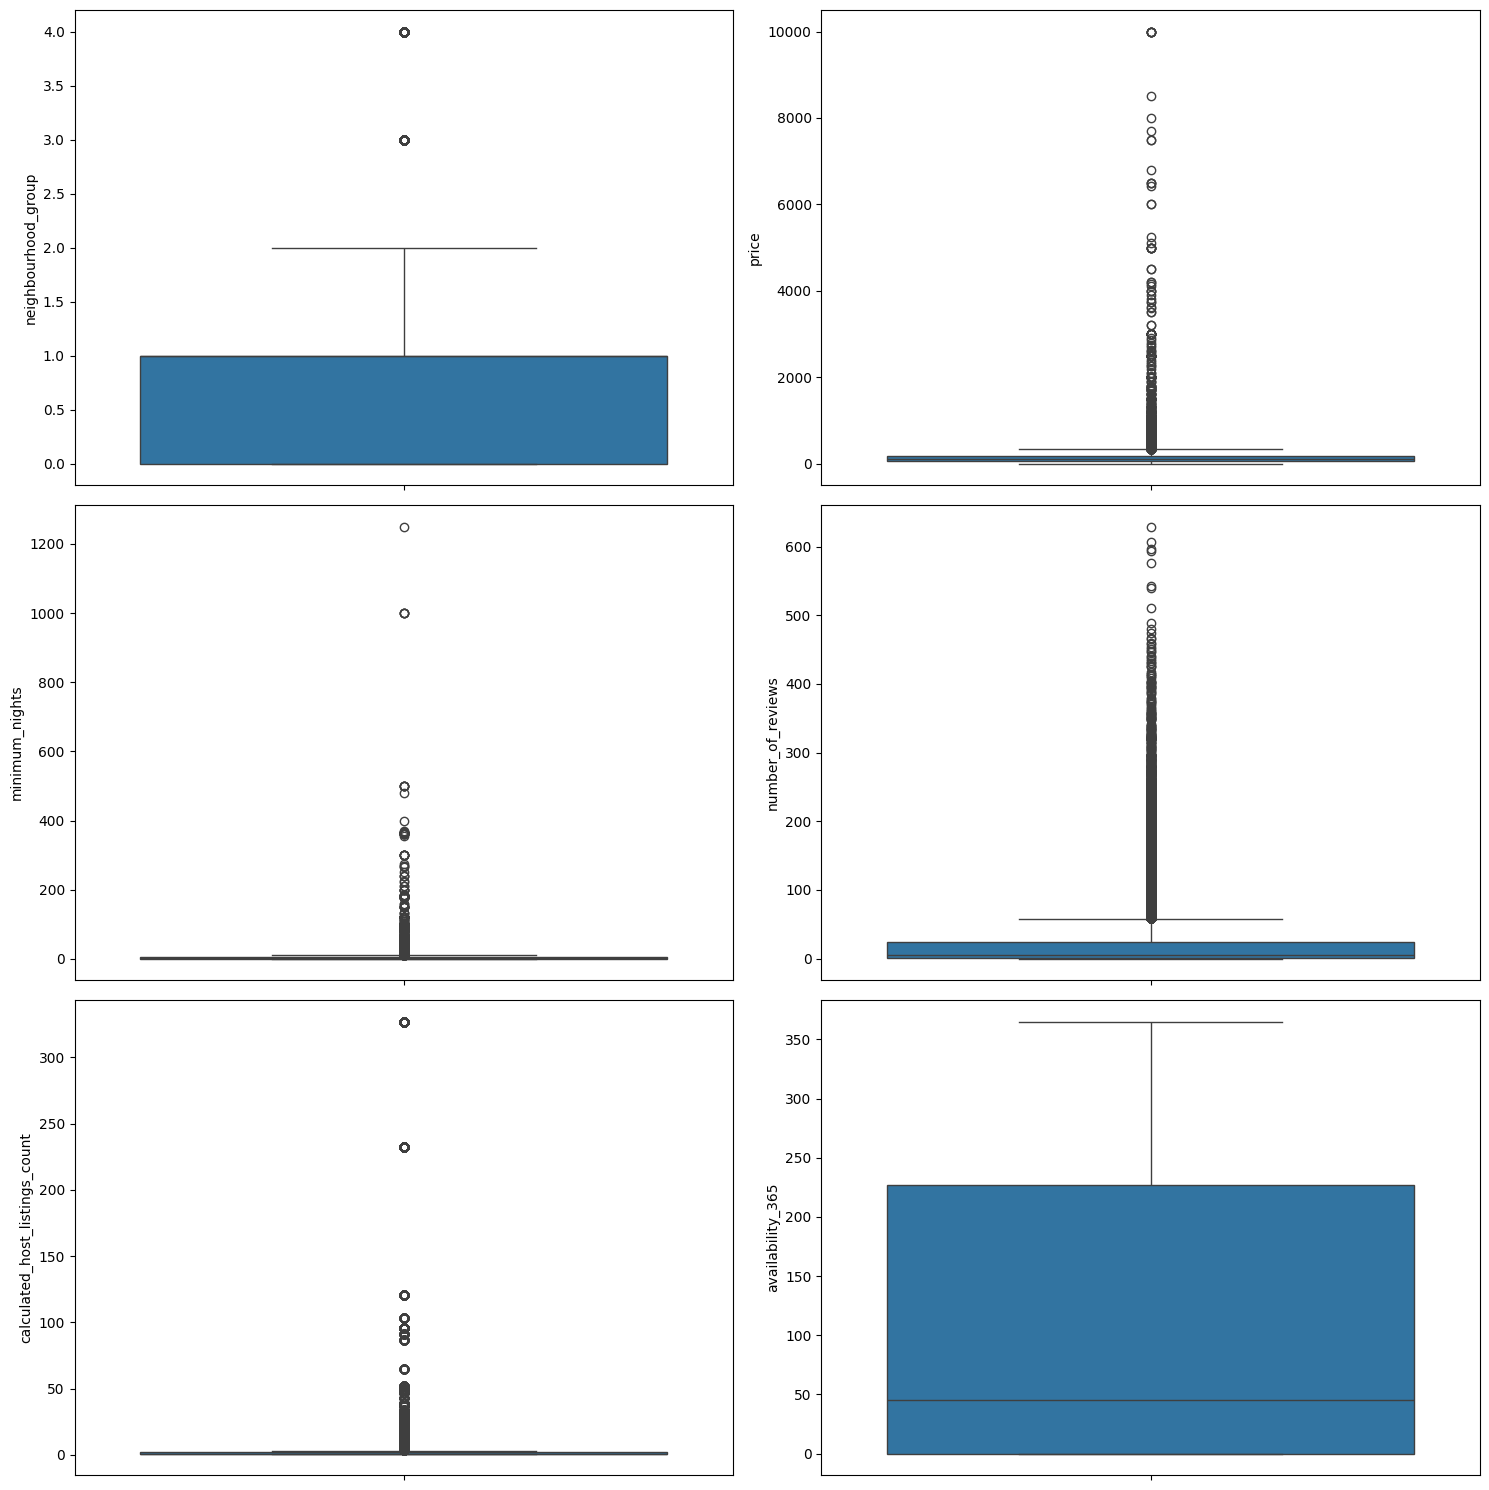

In [17]:
# Analisamos los Outliers con boxplots

fig, axes =plt.subplots(3,2,figsize=(15,15))

sns.boxplot(ax=axes[0,0],data=df,y='neighbourhood_group')
sns.boxplot(ax=axes[0,1],data=df,y='price')
sns.boxplot(ax=axes[1,0],data=df,y='minimum_nights')
sns.boxplot(ax=axes[1,1],data=df,y='number_of_reviews')
sns.boxplot(ax=axes[2,0],data=df,y='calculated_host_listings_count')
sns.boxplot(ax=axes[2,1],data=df,y='availability_365')

plt.tight_layout()
plt.show()

Nota: Identificamos los outliers en cada columna y analisamos su comportamiento para decidir que haremos com ellos (Mantenerlos,reemplazarlos o eliminarlos)

El Neighbourdhoud_group no se analiza ya que es una variable categorica, previamente factorizada y que es importante analizar en su totalidad para la predicción

In [18]:
#Analisamos la variable precio de manera aislada
estadisticas_price = df['price'].describe()
estadisticas_price

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [19]:
#Analisamos el Rango Intercuartilico

ric_precio = estadisticas_price['75%'] - estadisticas_price['25%']
limite_superio = estadisticas_price['75%'] + 1.5*ric_precio
limite_inferior = estadisticas_price['25%'] - 1.5*ric_precio

print(f'Rango Intercuratílico: {ric_precio}')
print(f'Límite superior: {limite_superio} \nLímite inferior: {limite_inferior}')

Rango Intercuratílico: 106.0
Límite superior: 334.0 
Límite inferior: -90.0


Análisis

El rango de los precios esta cargado a 0 o menor que 0, necesitamos revisar cuantos valores de precio menores que 1 tengo y cuantos mayores a 334

In [20]:
print(df[df['price']>334].count())
print(df[df['price']<=0].count())

host_id                           2972
neighbourhood_group               2972
neighbourhood                     2972
latitude                          2972
longitude                         2972
room_type                         2972
price                             2972
minimum_nights                    2972
number_of_reviews                 2972
calculated_host_listings_count    2972
availability_365                  2972
dtype: int64
host_id                           11
neighbourhood_group               11
neighbourhood                     11
latitude                          11
longitude                         11
room_type                         11
price                             11
minimum_nights                    11
number_of_reviews                 11
calculated_host_listings_count    11
availability_365                  11
dtype: int64


In [21]:
#Modificamos nuestro DataFrame para limpiar los precios menores de 0

df = df[df['price']>0]

Decidimos eliminar los valores de Precio 0 o menores, debido a que debe ser un error, no puede haber un airbnb que no tenga un precio. Además decidimos eliminarlos ya que 11 instancias no son representativas en el tamaño de la muestra.

In [22]:
#Definimos Funcion para Rango Intercuartilico ya que tendremos que hacer lo mismo con varias columnas

def analisis_ric(columna,df):
    estadisticas = df[columna].describe()
    ric = estadisticas['75%'] - estadisticas['25%']
    lim_sup = estadisticas['75%'] + 1.5*ric
    lim_inf = estadisticas['25%'] - 1.5*ric
    print(f'Rango Intercuratílico: {ric}')
    print(f'Límite superior: {lim_sup} \nLímite inferior: {lim_inf}')


In [23]:
#Análisis de 'minimum_nights'

df['minimum_nights'].describe()

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [24]:
    #Análisis RIC de minimun_night

analisis_ric('minimum_nights',df)

Rango Intercuratílico: 4.0
Límite superior: 11.0 
Límite inferior: -5.0


In [25]:
    #Comprobamos datos que se escapen de nuestros límites

print(df[df['minimum_nights']>30].count())

host_id                           747
neighbourhood_group               747
neighbourhood                     747
latitude                          747
longitude                         747
room_type                         747
price                             747
minimum_nights                    747
number_of_reviews                 747
calculated_host_listings_count    747
availability_365                  747
dtype: int64


In [26]:
df = df[df['minimum_nights']<=30]

Decidimos eliminar valores sobre los 30 días de mínimo de noches, ya que serían 733 instancias, lo cúal no es representativo para el tamaño de la muestra. Además es raro que el mínimo de noches sea tan alto para un Air BnB, es probable que estas propiedades no sean airbnb

In [27]:
#Analisis de 'number_of_reviews

df['number_of_reviews'].describe()

count    48137.000000
mean        23.466169
std         44.720067
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [28]:
    #Análisis RIC de number_of_reviews

analisis_ric('number_of_reviews',df)

Rango Intercuratílico: 23.0
Límite superior: 58.5 
Límite inferior: -33.5


In [29]:
print(df[df['number_of_reviews']>300].count())

host_id                           131
neighbourhood_group               131
neighbourhood                     131
latitude                          131
longitude                         131
room_type                         131
price                             131
minimum_nights                    131
number_of_reviews                 131
calculated_host_listings_count    131
availability_365                  131
dtype: int64


Decidimos mantener estos outliers en Número de reviews, debido a que es probable que ciertos air bnb tengas esa cantidad de reviews, y si bien esta variable por si sola no es capaz de predecir el precio, considero pertinente no modificar estos datos.

In [30]:
#Análisis de 'calculated_host_listing_count' (Cantidad de anuncios publicados por un host)

df['calculated_host_listings_count'].describe()

count    48137.000000
mean         7.145127
std         33.054483
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [31]:
    #Análisis RIC de calculated_host_listing_count

analisis_ric('calculated_host_listings_count',df)

Rango Intercuratílico: 1.0
Límite superior: 3.5 
Límite inferior: -0.5


In [32]:
print(df[df['calculated_host_listings_count']>100].count())

host_id                           773
neighbourhood_group               773
neighbourhood                     773
latitude                          773
longitude                         773
room_type                         773
price                             773
minimum_nights                    773
number_of_reviews                 773
calculated_host_listings_count    773
availability_365                  773
dtype: int64


Decidimos mantener estos outliers, debido a que es probable que existan host con muchas publicaciones de airbnbs. Además esta variable no tiene buena correlación con el precio y probablemente decida eliminarla.

In [33]:
#Valores Faltantes

df.isnull().sum().sort_values(ascending=False)

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48137 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48137 non-null  int64  
 1   neighbourhood_group             48137 non-null  int64  
 2   neighbourhood                   48137 non-null  int64  
 3   latitude                        48137 non-null  float64
 4   longitude                       48137 non-null  float64
 5   room_type                       48137 non-null  int64  
 6   price                           48137 non-null  int64  
 7   minimum_nights                  48137 non-null  int64  
 8   number_of_reviews               48137 non-null  int64  
 9   calculated_host_listings_count  48137 non-null  int64  
 10  availability_365                48137 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 4.4 MB


Con estas dos formas, indentificamos que no hay valores faltantes. Por lo tanto no debemos realizar ninguna acción.

In [35]:
# Nuevas Caracteristicas o eliminar redundantes

df = df.drop(['neighbourhood'],axis=1)

Nota: No podemos Inferir nuevas carácteristicas debido a que no tenemos carácteristicas que se relacionen entre sí. Con la excepción de Neighbourdhood y neighbourhood group, pero una es un subconjunto de la otra, así que la mejor opción es eliminar una de ellas para evitar redundancias.

In [36]:
#Verificamos que se haya eliminado la columna

df.columns

Index(['host_id', 'neighbourhood_group', 'latitude', 'longitude', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [42]:
# Escalar Caracteristicas

from sklearn.preprocessing import MinMaxScaler
 
variables = ['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
             'number_of_reviews', 'calculated_host_listings_count','availability_365' ]

scaler = MinMaxScaler()
caracteristicas_escaladas = scaler.fit_transform(df[variables])

df_escalado = pd.DataFrame(caracteristicas_escaladas, index=df.index, columns=variables)

df_escalado.head()


,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,0.00,0.0,0.013914,0.000000,0.014308,0.015337,1.000000
1,0.25,0.5,0.021522,0.000000,0.071542,0.003067,0.972603
2,0.25,0.0,0.014014,0.068966,0.000000,0.000000,1.000000
3,0.00,0.5,0.007908,0.000000,0.429253,0.000000,0.531507
4,0.25,0.5,0.007007,0.310345,0.014308,0.000000,0.000000


Nota:  Latitud y Longitud nunca se escalan por ser variables geográficas

In [46]:
# Seleccion de Características

from sklearn.feature_selection import f_classif,SelectKBest
from sklearn.model_selection import train_test_split

X = df_escalado.drop('price',axis=1)
y = df_escalado['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

modelo_de_seleccion = SelectKBest(f_classif,k=4) #Nos quedamos con las mejores 4 variables
modelo_de_seleccion.fit(X_train,y_train)
ix = modelo_de_seleccion.get_support() #Columnas con las que me voy a quedar

#Comprobamos las columnas originales con el soporte, para ver cuales elimine
print(X_train.columns)
print(ix)

Index(['neighbourhood_group', 'room_type', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
[False  True  True False  True  True]


In [51]:
#Nos quedamos con nuestro nuevos DataFrame con las columnas seleccionadas anteriormente

X_train_sel = pd.DataFrame(modelo_de_seleccion.transform(X_train),columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(modelo_de_seleccion.transform(X_test),columns=X_test.columns.values[ix])

X_test_sel

,room_type,minimum_nights,calculated_host_listings_count,availability_365
0,0.5,1.000000,0.708589,0.600000
1,0.0,0.482759,0.000000,0.000000
2,0.5,0.034483,0.003067,0.000000
3,0.5,0.000000,0.000000,0.000000
4,0.0,0.000000,0.027607,0.306849
...,...,...,...,...
9623,0.5,0.034483,0.000000,0.000000
9624,0.5,0.034483,0.000000,0.512329
9625,0.0,0.000000,0.003067,0.786301
9626,0.5,1.000000,0.003067,0.238356


In [1]:
#Agregamos el 'price' a los X de entrenamiento y test, para que esten completos 
X_train_sel['price'] = list(y_train)
X_test_sel['price'] = list(y_test)

NameError: name 'y_train' is not defined

In [ ]:
#Guardamos nuestros DF completos en la ruta indicada

X_train_sel.to_csv('../data/processed/train_limpio.csv',index=False)
X_test_sel.to_csv('../data/processed/test_limpio.csv',index=False)